In [1]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
path = '/home/keshenqiang/KDXF/DATA/商品需求训练集.csv'
data = pd.read_csv(path, sep=',',header=0)
data.head()

,product_id,date,is_sale_day,label
0,1001,2018-02-01,0,274.0
1,1001,2018-02-02,0,131.0
2,1001,2018-02-03,0,0.0
3,1001,2018-02-04,0,0.0
4,1001,2018-02-05,0,0.0


In [4]:
product_id = list(data['product_id'].unique())
month_list = ['2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',\
    '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
    '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12']

In [5]:
total_data = []
id_zero = {}
for id in product_id:
    # print(id)
    data_id = data[data['product_id']==id]
    data_id['date'] = pd.to_datetime(data_id['date'])
    data_id = data_id.set_index('date') 

    month_label = []
    for month in month_list:
        try:
            month_label.append(data_id[month]['label'].sum())
            if data_id[month]['label'].sum() == 0.:
                print(f'The sales volume of Product {id} in {month} was 0!')
                if id in id_zero.keys():
                    id_zero[id] += 1
                else:
                    id_zero[id] = 0
        except:
            month_label.append(0)
            print(f'The sales volume of Product {id} in {month} was unattainable!')
            if id not in id_zero.keys():
                id_zero[id] = 0
            else:
                id_zero[id] += 0
    total_data.append(month_label)
    

# print(total_data)
# total_data = np.array(total_data)

# print(total_data.shape)
# print(id_zero)
print(len(list(id_zero.keys())))

The sales volume of Product 1008 in 2018-02 was 0!
The sales volume of Product 1008 in 2020-02 was 0!
The sales volume of Product 1010 in 2020-02 was 0!
The sales volume of Product 1011 in 2020-02 was 0!
The sales volume of Product 1013 in 2018-02 was 0!
The sales volume of Product 1014 in 2018-04 was 0!
The sales volume of Product 1014 in 2020-02 was 0!
The sales volume of Product 1015 in 2018-02 was 0!
The sales volume of Product 1015 in 2018-03 was 0!
The sales volume of Product 1015 in 2020-02 was 0!
The sales volume of Product 1017 in 2018-02 was 0!
The sales volume of Product 1020 in 2018-02 was 0!
The sales volume of Product 1020 in 2018-03 was 0!
The sales volume of Product 1021 in 2018-02 was 0!
The sales volume of Product 1021 in 2018-03 was 0!
The sales volume of Product 1021 in 2018-04 was 0!
The sales volume of Product 1021 in 2018-05 was 0!
The sales volume of Product 1021 in 2018-06 was 0!
The sales volume of Product 1021 in 2018-07 was 0!
The sales volume of Product 102

In [8]:
id_zero

{1008: 1,
 1010: 0,
 1011: 0,
 1013: 0,
 1014: 1,
 1015: 2,
 1017: 0,
 1020: 1,
 1021: 7,
 1022: 8,
 1023: 14,
 1024: 11,
 1025: 10,
 1026: 13,
 1027: 13,
 1028: 14,
 1029: 14,
 1030: 14,
 1031: 16,
 1032: 17,
 1033: 18,
 1034: 23,
 1035: 24,
 1036: 25,
 1037: 28,
 1038: 27,
 1039: 27,
 1040: 27,
 1041: 27,
 1042: 31,
 1043: 30,
 1044: 31,
 1045: 31,
 1046: 30,
 1047: 31,
 1048: 31,
 1049: 30,
 1050: 31,
 1051: 31,
 1052: 30,
 1053: 33,
 1054: 33,
 1055: 31,
 1056: 31,
 1057: 31,
 1058: 33,
 1059: 33,
 1060: 33,
 1061: 33,
 1062: 33,
 1063: 15,
 1064: 17,
 1065: 16,
 1066: 16,
 1067: 16,
 1068: 16,
 1069: 19,
 1070: 19,
 1071: 19,
 1072: 19,
 1073: 19,
 1074: 19,
 1075: 22,
 1076: 22,
 1077: 21,
 1078: 21,
 1079: 22,
 1080: 22,
 1081: 24,
 1082: 25,
 1083: 24,
 1084: 24,
 1085: 25,
 1086: 24,
 1087: 24,
 1088: 24,
 1089: 24,
 1090: 24,
 1091: 24,
 1092: 25,
 1093: 24,
 1094: 24,
 1095: 24,
 1096: 24,
 1097: 24,
 1098: 24,
 1099: 25,
 1100: 25,
 1101: 25,
 1102: 25,
 1103: 25,
 1104: 26

In [10]:
zero_30_sum = 0   # 35个月份中有30个月份没有销售数据
for id in product_id:
    if id in id_zero.keys() and id_zero[id] >= 30:
        zero_30_sum += 1
zero_30_sum       # 74

zero_23_sum = 0   # 35个月份中只有不到一年的销售数据
for id in product_id:
    if id in id_zero.keys() and id_zero[id] >= 23:
        zero_23_sum += 1
zero_23_sum       # 109  - 74 = 35

109

In [11]:
# Take Product 1001 as a sample

for id in product_id:
    # print(id)
    data_id = data[data['product_id']==id]
    data_id['date'] = pd.to_datetime(data_id['date'])
    data_id = data_id.set_index('date') 

    month_label = []
    for month in month_list:
        try:
            month_label.append(data_id[month]['label'].sum())
            if data_id[month]['label'].sum() == 0.:
                print(f'The sales volume of Product {id} in {month} was 0!')
        except:
            month_label.append(0)
            print(f'The sales volume of Product {id} in {month} was unattainable!')
    
    break

month_label

[517.0,
 3190.0,
 4186.0,
 5412.0,
 5665.0,
 4954.0,
 5038.0,
 4726.0,
 4509.0,
 4840.0,
 5113.0,
 3469.0,
 986.0,
 3583.0,
 4438.0,
 5932.0,
 5087.0,
 4795.0,
 4314.0,
 3969.0,
 4256.0,
 3959.0,
 4375.0,
 1636.0,
 214.0,
 2555.0,
 2976.0,
 3701.0,
 3729.0,
 4025.0,
 3492.0,
 3213.0,
 3118.0,
 3364.0,
 3250.0]

In [12]:
didx = pd.date_range("2018-02-01", periods = 35, freq ='M')
didx

DatetimeIndex(['2018-02-28', '2018-03-31', '2018-04-30', '2018-05-31',
               '2018-06-30', '2018-07-31', '2018-08-31', '2018-09-30',
               '2018-10-31', '2018-11-30', '2018-12-31', '2019-01-31',
               '2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31',
               '2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30',
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31', '2020-08-31', '2020-09-30',
               '2020-10-31', '2020-11-30', '2020-12-31'],
              dtype='datetime64[ns]', freq='M')

In [13]:
train_data = pd.DataFrame(month_label, index=didx)
train_data.index.set_names = 'month'
train_data = train_data[0]
train_data

2018-02-28     517.0
2018-03-31    3190.0
2018-04-30    4186.0
2018-05-31    5412.0
2018-06-30    5665.0
2018-07-31    4954.0
2018-08-31    5038.0
2018-09-30    4726.0
2018-10-31    4509.0
2018-11-30    4840.0
2018-12-31    5113.0
2019-01-31    3469.0
2019-02-28     986.0
2019-03-31    3583.0
2019-04-30    4438.0
2019-05-31    5932.0
2019-06-30    5087.0
2019-07-31    4795.0
2019-08-31    4314.0
2019-09-30    3969.0
2019-10-31    4256.0
2019-11-30    3959.0
2019-12-31    4375.0
2020-01-31    1636.0
2020-02-29     214.0
2020-03-31    2555.0
2020-04-30    2976.0
2020-05-31    3701.0
2020-06-30    3729.0
2020-07-31    4025.0
2020-08-31    3492.0
2020-09-30    3213.0
2020-10-31    3118.0
2020-11-30    3364.0
2020-12-31    3250.0
Freq: M, Name: 0, dtype: float64

In [14]:
from PredictionModel import *

# parameter setting 
future = 3
insample = False


Importing plotly failed. Interactive plots will not work.


In [35]:
model_name = 'arima'
train_params = {'m': 12}
pred_params = {}

In [15]:
model_name = 'prophet'
train_params = {"growth": "linear", "seasonality_mode": "multiplicative", "cap": 10000}
pred_params = {}

In [31]:
model_name = 'holt'
train_params = {}
pred_params = {}

In [16]:
model = ModelDispatcher().dispatch(model_name=model_name, component='raw')
model.set_parameters(train_data, train_params)

predict_result = model.predict(future, pred_params)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Initial log joint probability = -49.6174
Iteration  1. Log joint probability =    14.7263. Improved by 64.3437.
Iteration  2. Log joint probability =    38.5868. Improved by 23.8605.
Iteration  3. Log joint probability =    56.8377. Improved by 18.2508.
Iteration  4. Log joint probability =    72.3065. Improved by 15.4688.
Iteration  5. Log joint probability =    72.9643. Improved by 0.657772.
Iteration  6. Log joint probability =    77.7164. Improved by 4.75217.
Iteration  7. Log joint probability =    78.0101. Improved by 0.293677.
Iteration  8. Log joint probability =    78.0506. Improved by 0.0405332.
Iteration  9. Log joint probability =    78.1191. Improved by 0.0684475.
Iteration 10. Log joint probability =     78.191. Improved by 0.0719495.
Iteration 11. Log joint probability =    78.2948. Improved by 0.103787.
Iteration 12. Log joint probability =    78.4045. Improved by 0.109707.
Iteration 13. Log joint probability =    78.4247. Improved by 0.0201801.
Iteration 14. Log joint

In [17]:
predict_result

2021-01-31    2842.907047
2021-02-28     246.788160
2021-03-31    1973.801423
dtype: float64

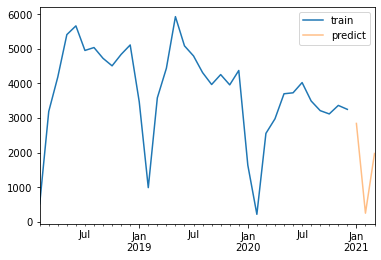

In [18]:
import matplotlib.pyplot as plt

train_data.plot(label='train')
predict_result.plot(label="predict", alpha=0.5)
plt.legend()
plt.show()

In [20]:
predicts = []
for i in predict_result:
    predicts.append(int(i) if i>0 else 0)

predicts

[2842, 246, 1973]

In [21]:
result = [predicts, [1, 2, 3]]

result[0][0]

2842